In [1]:
# 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram
# [作業目標]
# 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
# 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
# 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
app_train['HOUSETYPE_MODE'].value_counts()
app_train['AMT_CREDIT'].value_counts()

# 連續資料離散化
app_train['AMT_CREDIT_BINS'] = pd.cut(app_train['AMT_CREDIT'], bins = np.linspace(app_train['AMT_CREDIT'].min(), app_train['AMT_CREDIT'].max(), num = 10))
print(app_train['AMT_CREDIT_BINS'].value_counts())

group_amt_credit = app_train.groupby('HOUSETYPE_MODE')['AMT_CREDIT_BINS']
group_amt_credit.value_counts()

(45000.0, 490000.0]       143942
(490000.0, 935000.0]      106958
(935000.0, 1380000.0]      43012
(1380000.0, 1825000.0]     10210
(1825000.0, 2270000.0]      2580
(2270000.0, 2715000.0]       535
(2715000.0, 3160000.0]        24
(3605000.0, 4050000.0]        12
(3160000.0, 3605000.0]         8
Name: AMT_CREDIT_BINS, dtype: int64


HOUSETYPE_MODE    AMT_CREDIT_BINS       
block of flats    (45000.0, 490000.0]       68140
                  (490000.0, 935000.0]      51864
                  (935000.0, 1380000.0]     22414
                  (1380000.0, 1825000.0]     5931
                  (1825000.0, 2270000.0]     1640
                  (2270000.0, 2715000.0]      365
                  (2715000.0, 3160000.0]       19
                  (3160000.0, 3605000.0]        6
                  (3605000.0, 4050000.0]        5
specific housing  (45000.0, 490000.0]         736
                  (490000.0, 935000.0]        511
                  (935000.0, 1380000.0]       215
                  (1380000.0, 1825000.0]       30
                  (1825000.0, 2270000.0]        4
                  (2270000.0, 2715000.0]        2
terraced house    (45000.0, 490000.0]         543
                  (490000.0, 935000.0]        459
                  (935000.0, 1380000.0]       160
                  (1380000.0, 1825000.0]       38
         

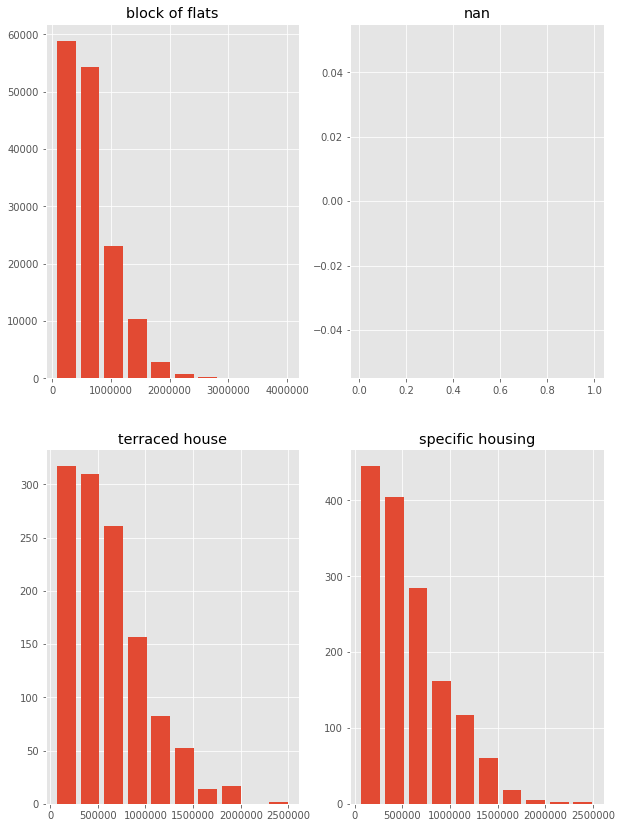

In [43]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    # plt.hist(app_train['AMT_CREDIT'], bins = 10)
    app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]), 'AMT_CREDIT'].hist(rwidth=0.8, bins = 10)  
    plt.title(str(unique_house_type[i]))
    
plt.show()   